### Part B - ML Assignment 2

#### Part A
- We open the dataset from the CSV file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Importing the dataset
df = pd.read_csv('heart_uci.csv')

# Displaying the dataset as a table
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


- Check for Missing Values

In [3]:
# Looking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

- Handling Missing Values by replacing them with the mean of the column

In [4]:
# Handling missing values by replacing them with the mean of the column
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mean())

# Checking for missing values again
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- Grouping classes 2, 3 and 4 as Class 1 to allow for Binary Classification

In [5]:
# Grouping classes 2, 3 and 4 into class 1
df['target'] = df['target'].replace([2, 3, 4], 1)

#### Exploratory Data Analysis

1. Visualisation of Target Variable

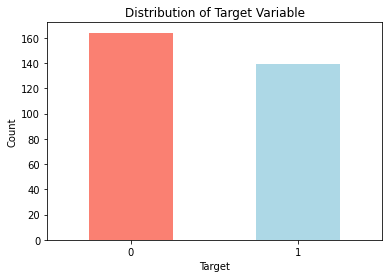

In [6]:
# Perform Exploratory Data Analysis

# Plotting the distribution of the target variable
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

2. Pairplot

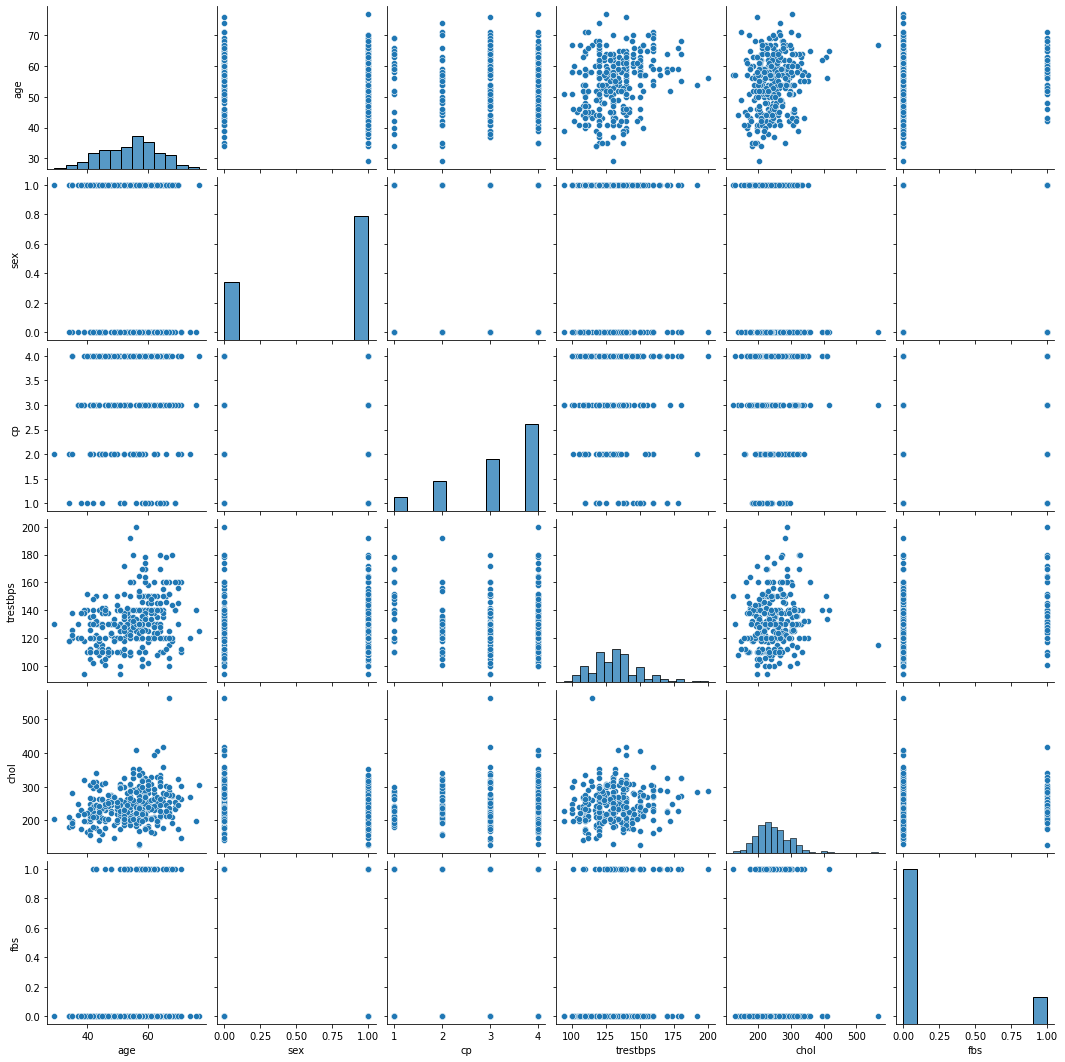

In [7]:
# Plot a pairplot to see the relationship between the first six features
import seaborn as sns
df_subset = df.iloc[:, 0:6]
sns.pairplot(df_subset)
plt.show()

3. Correlation Heatmap

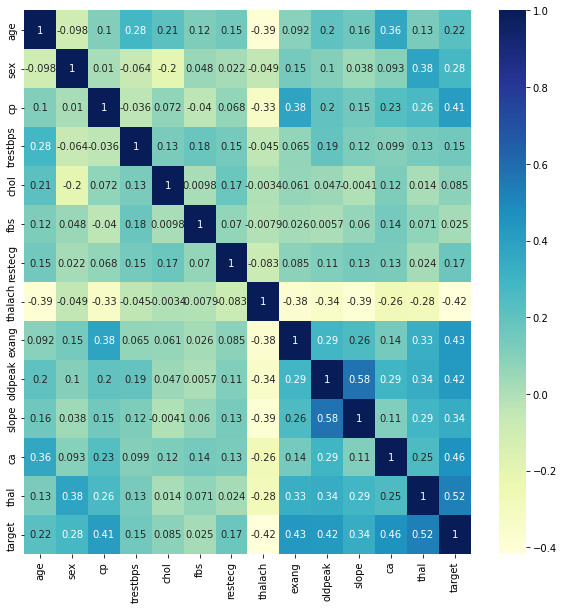

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

4. Statistical Analysis

In [9]:
# Print the mean, variance and standard deviation of each feature visually
print('Mean of each feature:')
print(df.mean())

print('\nVariance of each feature:')
print(df.var())

print('\nStandard Deviation of each feature:')
print(df.std())

Mean of each feature:
age          54.438944
sex           0.679868
cp            3.158416
trestbps    131.689769
chol        246.693069
fbs           0.148515
restecg       0.990099
thalach     149.607261
exang         0.326733
oldpeak       1.039604
slope         1.600660
ca            0.672241
thal          4.734219
target        0.458746
dtype: float64

Variance of each feature:
age           81.697419
sex            0.218368
cp             0.921841
trestbps     309.751120
chol        2680.849190
fbs            0.126877
restecg        0.989968
thalach      523.265775
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             0.867151
thal           3.737542
target         0.249120
dtype: float64

Standard Deviation of each feature:
age          9.038662
sex          0.467299
cp           0.960126
trestbps    17.599748
chol        51.776918
fbs          0.356198
restecg      0.994971
thalach     22.875003
exang        0.469794
oldpeak      1.161075
slope 

5. Histogram and Kernel Density Plots

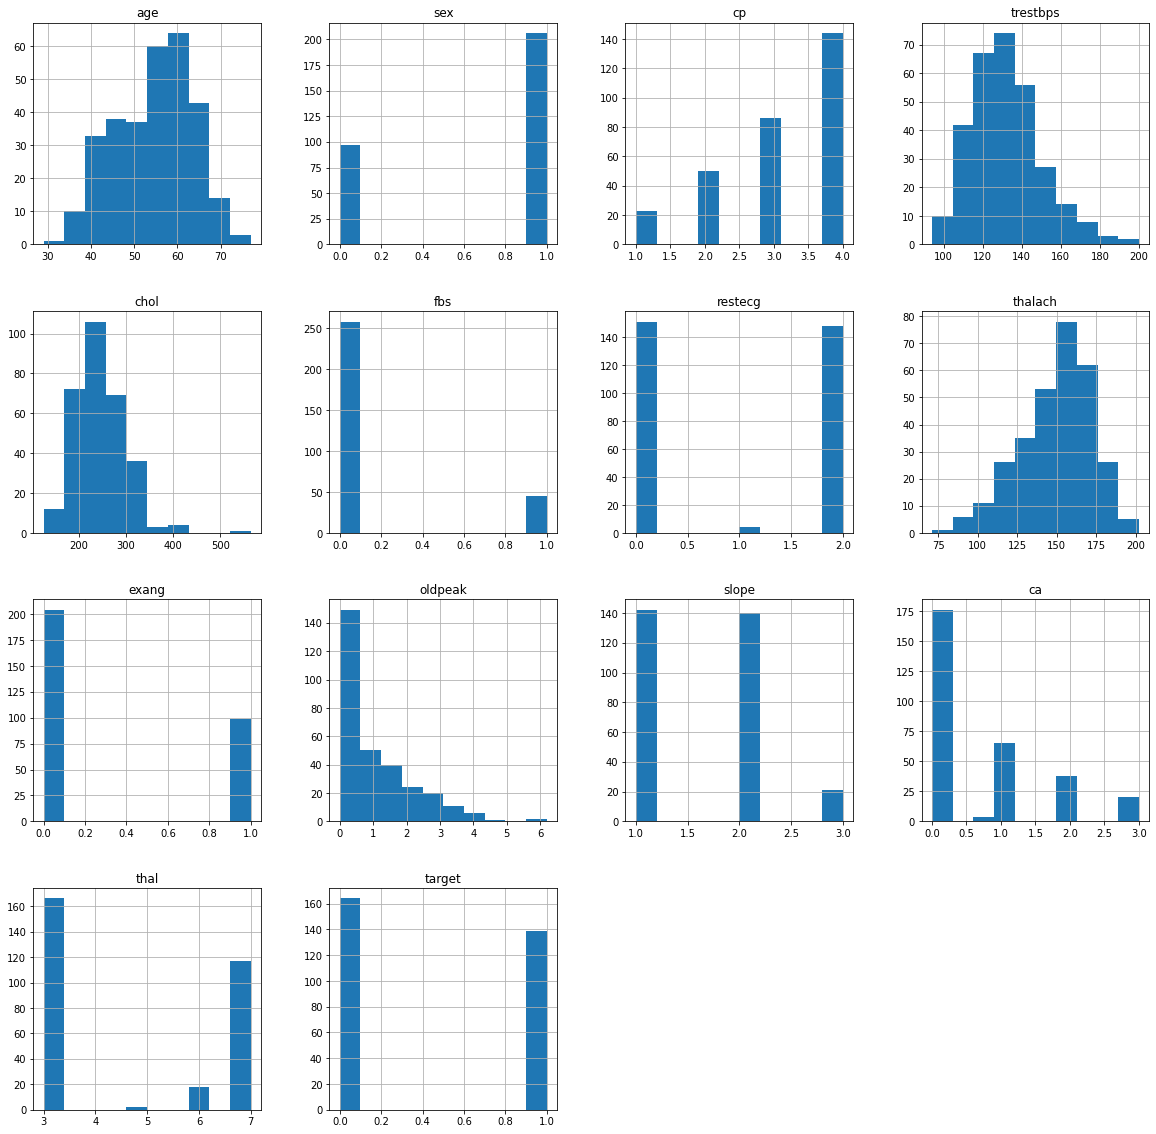

In [10]:
# Make histograms for continuous features
df.hist(figsize=(20, 20))
plt.show()

6. Box Plots

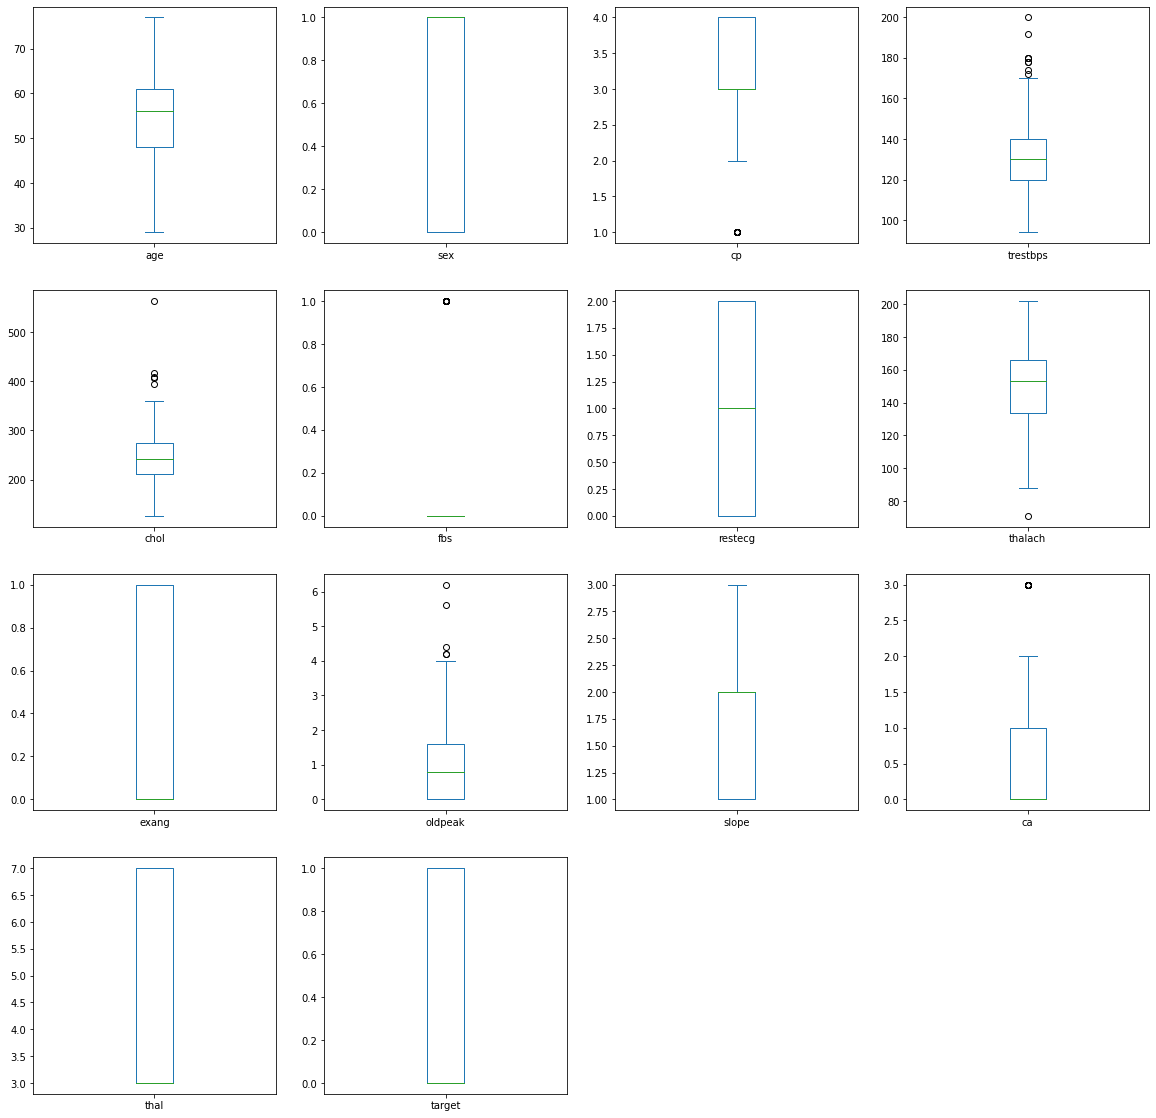

In [11]:
# Make boxplots for continuous features
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(20, 20))
plt.show()

- Separate features and labels
- Perform standardisation using Z-score normalisation

In [12]:
# Separating features and labels
X = df.drop(['target'], axis=1)
y = df['target']

# Standardizing the features
X = (X - X.mean()) / X.std()

#### Part B:
- Split the dataset into train and tests in the ratio 80:20

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Displaying the shape of the training and test sets
print(X_train.shape)
print(X_test.shape)

# Display the first five rows of the training set
X_train.head()

(242, 13)
(61, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,-2.814459,0.685069,-1.206525,-0.096011,-0.824558,-0.416945,1.015005,2.290393,-0.69548,-0.895381,-0.974740,-0.721901,-0.897038
202,0.283345,0.685069,-0.164995,1.040369,-2.331021,2.390484,-0.995103,1.022633,-0.69548,-0.723126,-0.974740,0.351972,1.171993
196,1.610975,0.685069,-2.248056,1.608559,-0.245149,2.390484,1.015005,-0.813432,-0.69548,-0.809253,0.648041,0.351972,-0.897038
75,1.168431,-1.454889,-0.164995,1.608559,2.188368,-0.416945,1.015005,0.060885,-0.69548,-0.206364,-0.974740,-0.721901,-0.897038
176,-0.269835,0.685069,0.876535,-1.346029,-0.264463,2.390484,-0.995103,-0.113979,-0.69548,-0.809253,-0.974740,2.499716,1.171993


In [15]:
# Display the first five rows of the test set
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,-0.159199,0.685069,-0.164995,-0.096011,-0.013386,2.390484,1.015005,1.022633,-0.69548,-0.895381,-0.974740,2.499716,-0.897038
228,-0.048563,0.685069,0.876535,-1.232391,-0.785931,-0.416945,1.015005,-1.818896,1.43311,-0.895381,0.648041,0.351972,-0.897038
111,0.172709,0.685069,0.876535,-0.380106,0.044555,2.390484,1.015005,-0.245126,1.43311,0.138144,0.648041,0.351972,-0.897038
246,0.393980,0.685069,0.876535,-1.800581,-0.245149,-0.416945,-0.995103,0.279464,-0.69548,-0.809253,-0.974740,0.351972,1.171993
60,-0.380470,-1.454889,0.876535,-0.096011,1.126118,-0.416945,-0.995103,-0.332558,1.43311,0.138144,0.648041,-0.721901,1.171993


#### Part C
- Fit a decision tree with entropy and gini criterion and compare accuracies on the testing data

In [28]:
# Applying Decision Tree Classifier
dtc_one = DecisionTreeClassifier(criterion='entropy')
dtc_two = DecisionTreeClassifier(criterion='gini')

# Fitting the model
dtc_one.fit(X_train, y_train)
dtc_two.fit(X_train, y_train)

# Predicting the Test set results
y_pred_one = dtc_one.predict(X_test)
y_pred_two = dtc_two.predict(X_test)

# Calculating the accuracy of the model
print('Accuracy of Decision Tree Classifier with Entropy Criterion: ', accuracy_score(y_test, y_pred_one))
print('Accuracy of Decision Tree Classifier with Gini Criterion: ', accuracy_score(y_test, y_pred_two))

criteria = ['entropy', 'gini']
criteria_chosen = None
print('\n')
if accuracy_score(y_test, y_pred_one) > accuracy_score(y_test, y_pred_two):
    criteria_chosen = criteria[0]
    print('Decision Tree Classifier with Entropy Criterion is better.')
else:
    criteria_chosen = criteria[1]
    print('Decision Tree Classifier with Gini Criterion is better.')

Accuracy of Decision Tree Classifier with Entropy Criterion:  0.8032786885245902
Accuracy of Decision Tree Classifier with Gini Criterion:  0.7540983606557377


Decision Tree Classifier with Entropy Criterion is better.


- We pick Entropy Criterion

#### Part D

In [34]:
# Grid Search to find the best parameters for Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion=criteria_chosen, random_state=42)

# Defining the parameters
parameters = {'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': [None, 'sqrt', 'log2', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dtc, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 117 candidates, totalling 1170 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [None, 'sqrt', 'log2', 1, 2, 3, 4, 5,
                                          6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy', verbose=1)

In [35]:
# Displaying the best parameters
grid_search.best_params_

print("Best Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)

Best Score:  0.8019999999999999
Best Params:  {'max_features': 9, 'min_samples_split': 5}


In [36]:
# Make Model with best parameters
dtc_best = DecisionTreeClassifier(criterion=criteria_chosen, max_features=grid_search.best_params_['max_features'], 
                                  min_samples_split=grid_search.best_params_['min_samples_split'], random_state=42)

# Fitting the model
dtc_best.fit(X_train, y_train)

# Predicting the Test set results
y_pred_best = dtc_best.predict(X_test)

# Calculating the accuracy of the model
print('Accuracy of Decision Tree Classifier with Best Parameters: ', accuracy_score(y_test, y_pred_best))

Accuracy of Decision Tree Classifier with Best Parameters:  0.7704918032786885


### Part E

In [20]:
# Grid Search to find the best parameters for Random Forest Classifier
rfc = RandomForestClassifier(random_state=0, criterion=criteria_chosen)

# Defining the parameters
parameters = {'n_estimators': [5, 10, 20, 30, 40, 50, 60], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Using GridSearchCV to find the best parameters using 10-fold cross validation
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Displaying the best parameters
print("Best Hyper Parameters:\n", grid_search.best_params_)

Fitting 10 folds for each of 693 candidates, totalling 6930 fits
Best Hyper Parameters:
 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 60}


In [21]:
# Make Model with best parameters
rfc_best = RandomForestClassifier(criterion=criteria_chosen, max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'],
                                  n_estimators=grid_search.best_params_['n_estimators'])

# Fitting the model
rfc_best.fit(X_train, y_train)

# Predicting the Test set results
y_pred_best = rfc_best.predict(X_test)

# Calculating the accuracy of the model
print('Accuracy of Random Forest Classifier with Best Parameters: ', accuracy_score(y_test, y_pred_best))

# Print the classification report
print(classification_report(y_test, y_pred_best))

Accuracy of Random Forest Classifier with Best Parameters:  0.9180327868852459
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

